In [1]:
from naqst import *
from openpyxl import Workbook
import math
import time
from vfsexp import Vf
from Enola.codegen import CodeGen, global_dict
from Enola.route import QuantumRouter
import json
from qiskit.qasm2.export import dump

In [14]:
path_type = 'qft_cz'
path = "Data/{}/circuits/".format(path_type)
path_embeddings = "Data/{}/Rb2Re4/embeddings/".format(path_type)
path_partitions = "Data/{}/Rb2Re4/partitions/".format(path_type)
file_name = 'cz_2q_qft_{}.qasm'.format(12)
cz_circuit = CreateCircuitFromQASM(file_name, path)
gate_2q_list = get_2q_gates_list(cz_circuit)
cirr, dag = gates_list_to_QC(gate_2q_list)
gate_num = len(gate_2q_list)
num_q = qubits_num(gate_2q_list)
Rb = 2
r_re = 2*Rb
arch_size = math.ceil(math.sqrt(num_q))
coupling_graph = generate_grid_with_Rb(arch_size,arch_size, Rb)
partition_gates = read_data(path_partitions, file_name.removesuffix(".qasm")+'.txt')
embeddings = read_data(path_embeddings, file_name.removesuffix(".qasm")+'.txt')

Data/qft_cz/circuits/cz_2q_qft_12.qasm


In [15]:
for emb in embeddings:
    print(emb)

[[3, 0], [2, 0], [2, 2], [1, 3], [0, 3], [0, 2], [0, 0], [2, 1], [1, 2], [1, 0], [1, 1], [0, 1]]
[[3, 0], [2, 0], [2, 1], [1, 1], [1, 2], [0, 2], [0, 3], [1, 3], [0, 1], [2, 2], [1, 0], [3, 1]]
[[2, 1], [1, 0], [1, 1], [0, 2], [0, 0], [0, 1], [1, 2], [2, 0], [3, 0], [2, 2], [0, 3], [3, 1]]
[[0, 2], [0, 1], [1, 1], [0, 0], [0, 3], [2, 0], [3, 0], [1, 2], [1, 0], [1, 3], [2, 1], [2, 2]]


In [16]:
parallel_gates = []
time_paral = time.time()
for i in range(len(partition_gates)):
    gates = get_parallel_gates(partition_gates[i], coupling_graph, embeddings[i], r_re)
    parallel_gates.append(gates)

In [17]:
route = QuantumRouter(num_q, embeddings, partition_gates, [arch_size, arch_size])
route.run()
all_movements = route.movement_list

In [18]:
for moves in all_movements:
    print("...")
    for paral in moves:
        print(paral)

...
[[9, (1, 0), (2, 2)]]
[[6, (0, 0), (0, 3)]]
[[11, (0, 1), (3, 1)]]
[[8, (1, 2), (0, 1)], [2, (2, 2), (2, 1)]]
[[7, (2, 1), (1, 3)]]
[[4, (0, 3), (1, 2)]]
[[3, (1, 3), (1, 1)], [10, (1, 1), (1, 0)]]
...
[[4, (1, 2), (0, 0)]]
[[7, (1, 3), (2, 0)]]
[[8, (0, 1), (3, 0)]]
[[10, (1, 0), (0, 3)]]
[[0, (3, 0), (2, 1)], [6, (0, 3), (1, 2)]]
[[3, (1, 1), (0, 2)], [1, (2, 0), (1, 0)]]
[[5, (0, 2), (0, 1)]]
[[2, (2, 1), (1, 1)]]
...
[[5, (0, 1), (2, 0)], [10, (0, 3), (2, 1)]]
[[7, (2, 0), (1, 2)], [9, (2, 2), (1, 3)]]
[[4, (0, 0), (0, 3)]]
[[8, (3, 0), (1, 0)], [0, (2, 1), (0, 2)]]
[[6, (1, 2), (3, 0)], [3, (0, 2), (0, 0)]]
[[11, (3, 1), (2, 2)], [1, (1, 0), (0, 1)]]


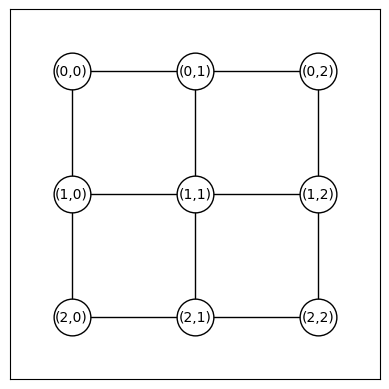

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个3x3网格图
G = nx.grid_2d_graph(3, 3)

# 设置节点的位置
pos = {(x, y): (y, -x) for x, y in G.nodes()}

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors='black', node_size=700, linewidths=1, node_shape='o')

# 绘制边
nx.draw_networkx_edges(G, pos)

# 绘制节点标签
nx.draw_networkx_labels(G, pos, labels={(x, y): f'({x},{y})' for x, y in G.nodes()}, font_size=10, font_family='sans-serif')

# 设置图形的显示范围
plt.xlim(-0.5, 2.5)
plt.ylim(-2.5, 0.5)

# 设置图形的坐标比例
plt.gca().set_aspect('equal', adjustable='box')

# 显示图形
plt.show()
